# Знакомимся с новыми данными: коронавирус #

In [3]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv', sep=',')
display(covid_data.info())
display(covid_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            306429 non-null  object 
 1   province/state  228329 non-null  object 
 2   country         306429 non-null  object 
 3   confirmed       306429 non-null  float64
 4   deaths          306429 non-null  float64
 5   recovered       306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


None

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[[
    'country',
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations',
    'vaccines'
    ]]
display(vaccinations_data.info())
display(vaccinations_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   date                                 42795 non-null  object 
 2   total_vaccinations                   23457 non-null  float64
 3   people_vaccinated                    22371 non-null  float64
 4   people_vaccinated_per_hundred        22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   vaccines                             42795 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


None

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


## Предобработка данных ##

In [5]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [6]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [7]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [8]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [9]:
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [11]:
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


----

###  Задание 3.1 ###

За какой период представлены данные в таблице `covid_data`? В качестве ответа ввести даты в формате `datetime` (без указания времени в следующем формате без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

***Ответ - 2020-01-22-2021-05-29***

In [12]:
covid_data['date'].describe(datetime_is_numeric=True)

count                            86785
mean     2020-10-15 20:19:34.931151616
min                2020-01-22 00:00:00
25%                2020-06-25 00:00:00
50%                2020-10-17 00:00:00
75%                2021-02-07 00:00:00
max                2021-05-29 00:00:00
Name: date, dtype: object

----

###  Задание 3.2 ###

За какой период представлены данные в таблице `vaccinations_data`? В качестве ответа ввести даты в формате `datetime` без указания времени в формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

***Ответ - 2020-12-02-2021-09-06***

In [13]:
vaccinations_data['date'].describe(datetime_is_numeric=True)

count                            42795
mean     2021-05-21 12:12:46.182965248
min                2020-12-02 00:00:00
25%                2021-04-02 00:00:00
50%                2021-05-26 00:00:00
75%                2021-07-15 00:00:00
max                2021-09-06 00:00:00
Name: date, dtype: object

----

###  Задание 3.3 ##

С помощью метода `merge()` объединить таблицы `covid_data` и `vaccinations_data` по столбцам `date` и `country`.

Тип объединения выставить так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в **задании 3.1**. То есть в результирующую таблицу должны попасть все записи из таблицы `covid_data` и из её пересечения с `vaccinations_data`, но не более. Результат объединения занести в переменную `covid_df`.

Сохранить таблицу `covid_df` - она понадобится в следующем юните.

Сколько строк и столбцов в таблице `covid_df`? Ввести ответ в виде двух чисел через дефис (например, 333-33): первое число - количество строк, второе число - количество столбцов.

***Ответ - 86785-16***

In [14]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
display(covid_df)
display(covid_df.info())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

None

In [15]:
covid_df.to_csv('data/covid_df.csv', index=False, sep=',')

В получившейся в **задании 3.3** таблице `covid_df` создать признаки:

- `death_rate` - общий процент смертей среди зафиксированных случаев (летальность);
- `recover_rate` - общий процент случаев выздоровления.

Данные характеристики рассчитать как отношение числа смертей (`deaths`) и числа выздоровлений (`recovered`) к числу зафиксированных случаев (`confirmed`) и умножить результаты на 100%.

In [16]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

None

----

###  Задание 3.4 ###

Какова максимальная летальность в США (`United States`) за весь период? Ответ округлить до второго знака после запятой.

***Ответ - 7.19***

In [17]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

----

###  Задание 3.5 ##

Чему равен средний процент выздоровевших в России (`Russia`)? Ответ округлить до второго знака после запятой.

***Ответ - 67.06***

In [18]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

# Графические возможности библиотеки Pandas #

## Базовая визуализация в Pandas ##

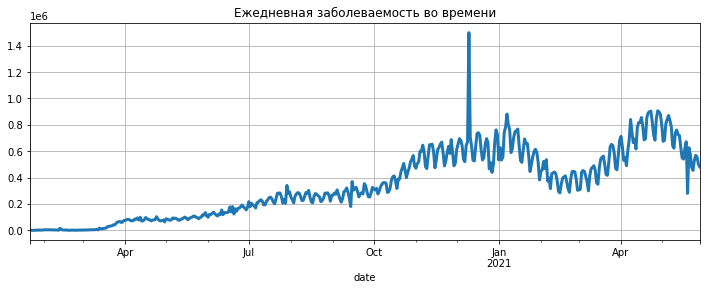

In [19]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3
);

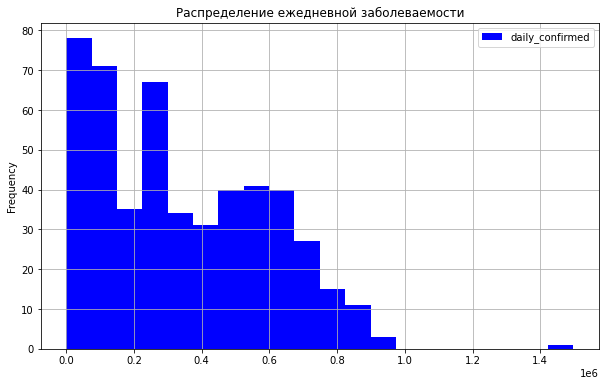

In [20]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='blue',
    legend=True,
    bins=20
);

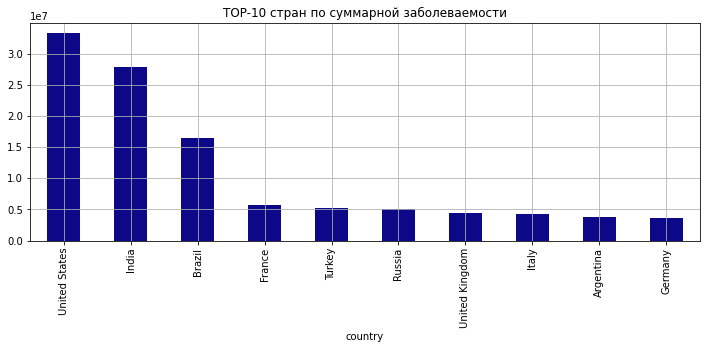

In [21]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    title='TOP-10 стран по суммарной заболеваемости',
    figsize=(12, 4),
    colormap='plasma'
);

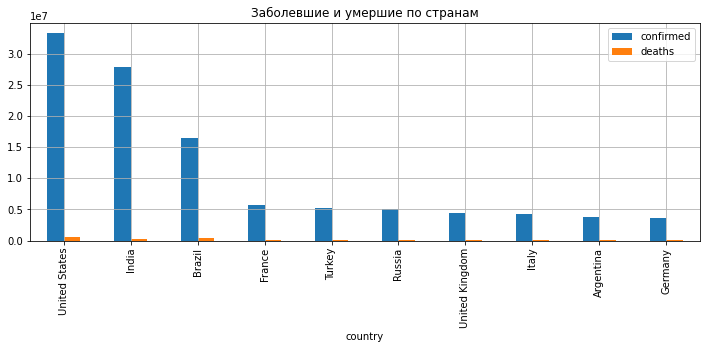

In [22]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    title='Заболевшие и умершие по странам',
    figsize=(12, 4)
);

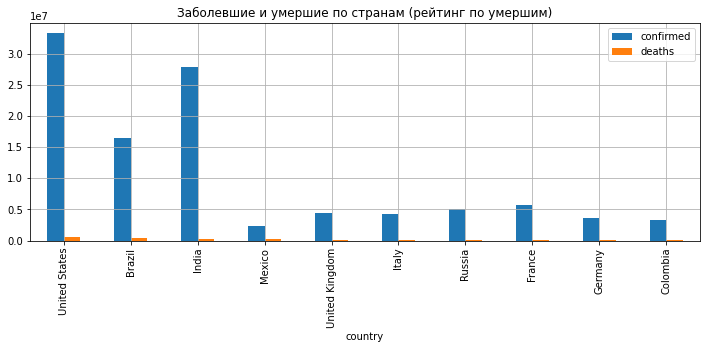

In [23]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(
    kind='bar',
    grid=True,
    title='Заболевшие и умершие по странам (рейтинг по умершим)',
    figsize=(12, 4)
);

----

###  Задание 4.1 ###

Какой параметр в методе plot() библиотеки Pandas отвечает за выбор типа визуализации?

***Ответ - kind***

----

###  Задание 4.2 ###

Параметр метода plot(), который отвечает за установку названия оси ординат?

***Ответ - ylabel***

----

###  Задание 4.3 ###

С помощью какого из перечисленных ниже вариантов кода можно получить такой график?

***Ответ ниже***

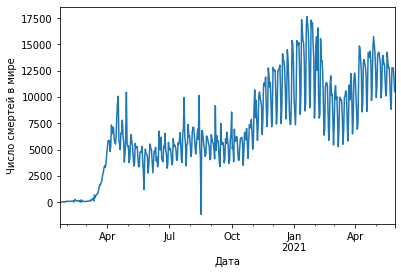

In [24]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line', xlabel='Дата', ylabel='Число смертей в мире');

----

###  Задание 4.4 ###

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (`total_vaccinations`)?

В данном задании используется метод `nsmallest()`, который позволяет выбрать **`n`** наименьших значений в Series, а также метод `last()`, с помощью которого можно получить первое непустое значение в группах.

***Ответ ниже***

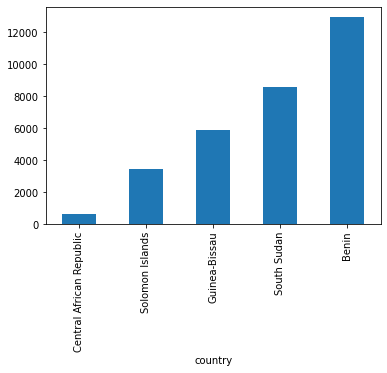

In [25]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

----

###  Задание 4.5 ###

График из **задания 4.4**. В какой стране число вакцинированных наименьшее?

***Ответ - Центральноафриканская республика*** 

# Графические возможности библиотеки Matplotlib #

In [27]:
import matplotlib.pyplot as plt
##### Для корректной работы Jupyter Notebook #####
%matplotlib inline
##### Для корректного отображения графиков в тёмной теме #####
plt.style.use('default') #####

## Основные объекты matplotlib ##

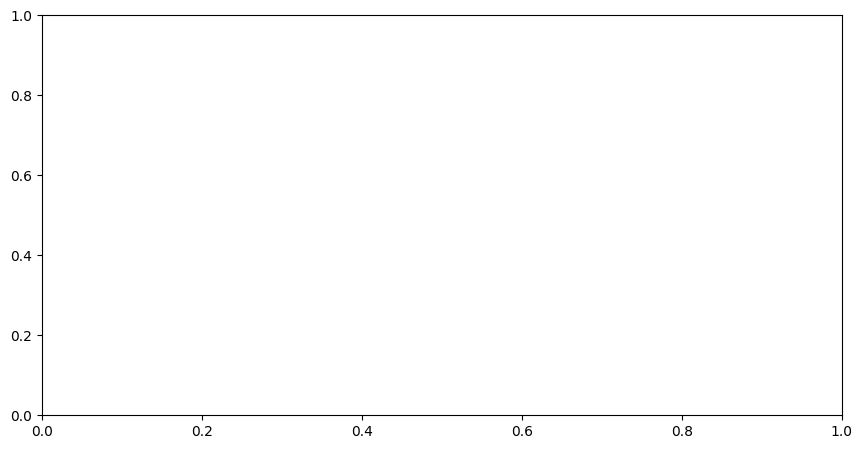

In [28]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

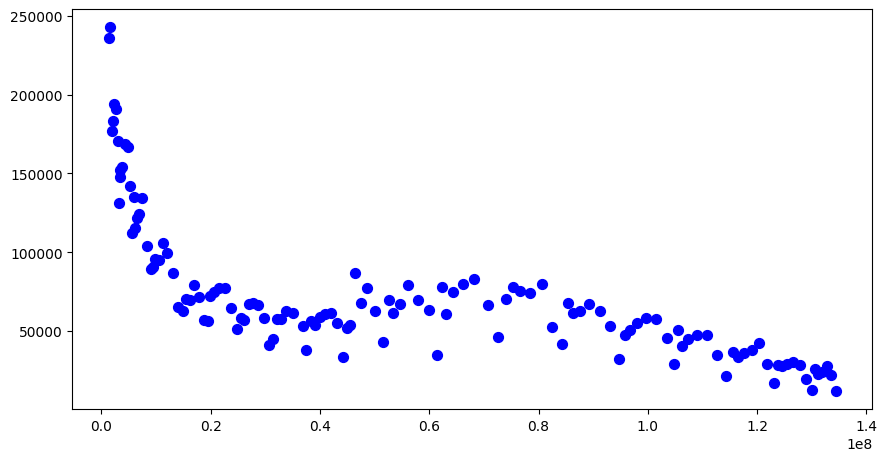

In [29]:
us_data = covid_df[covid_df['country'] == 'United States']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=50,
    marker='o',
    c='blue'
);

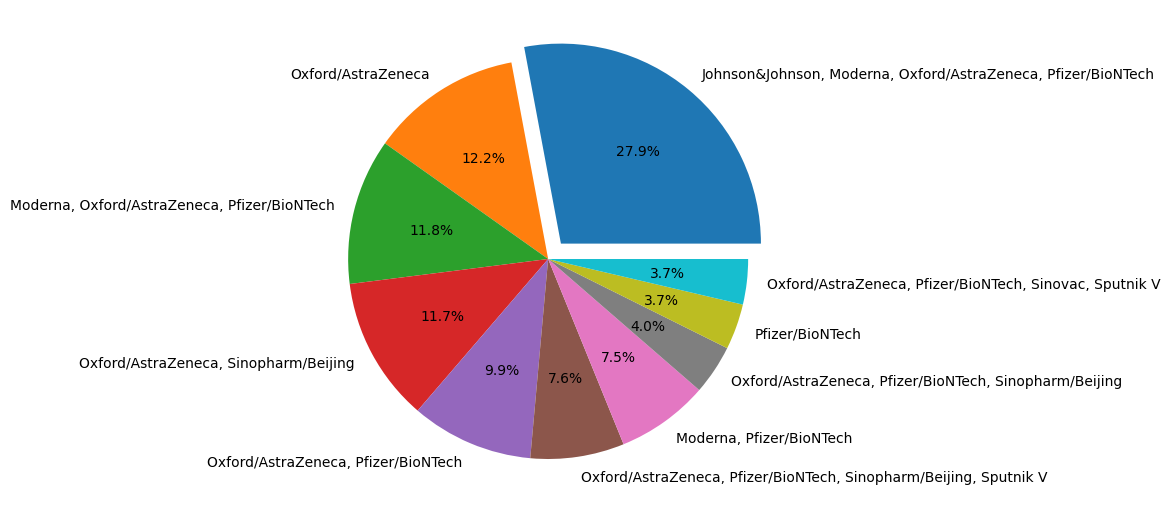

In [30]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [31]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [32]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))
display(combination_last)

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

In [33]:
vaccines_dict = {}
for vaccines_list in combination_last:
    for vaccine in vaccines_list:
        if vaccine not in vaccines_dict:
            vaccines_dict[vaccine] = 1
        else:
            vaccines_dict[vaccine] += 1

In [34]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

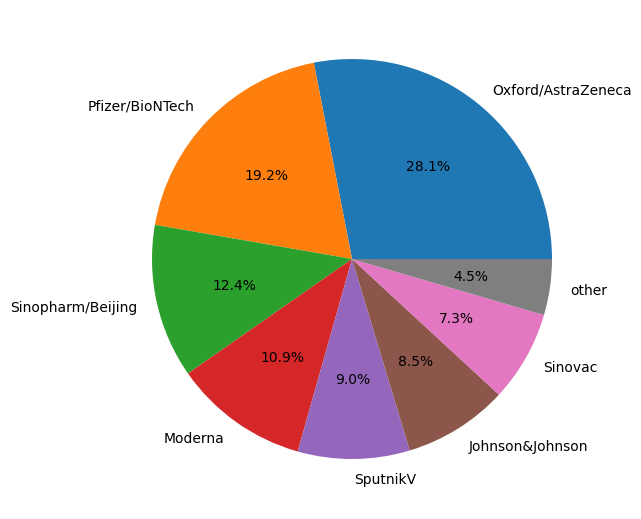

In [35]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%'
);

## Добавление информативности в графики ##

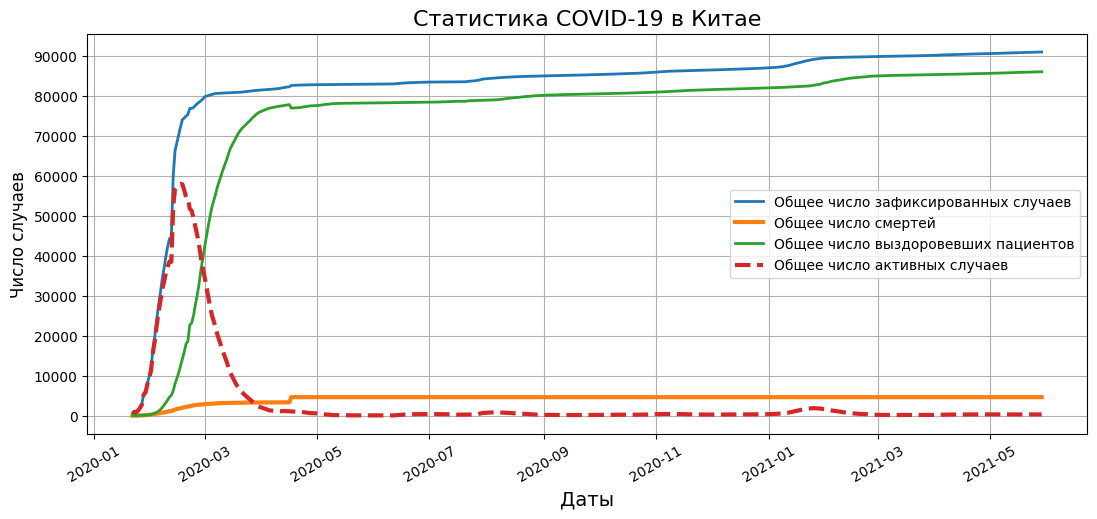

In [36]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=2)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

axes.set_title('Статистика COVID-19 в Китае', fontsize=16)
axes.set_xlabel('Даты', fontsize=14)
axes.set_ylabel('Число случаев', fontsize=12)
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

## Использование нескольких систем координат ##

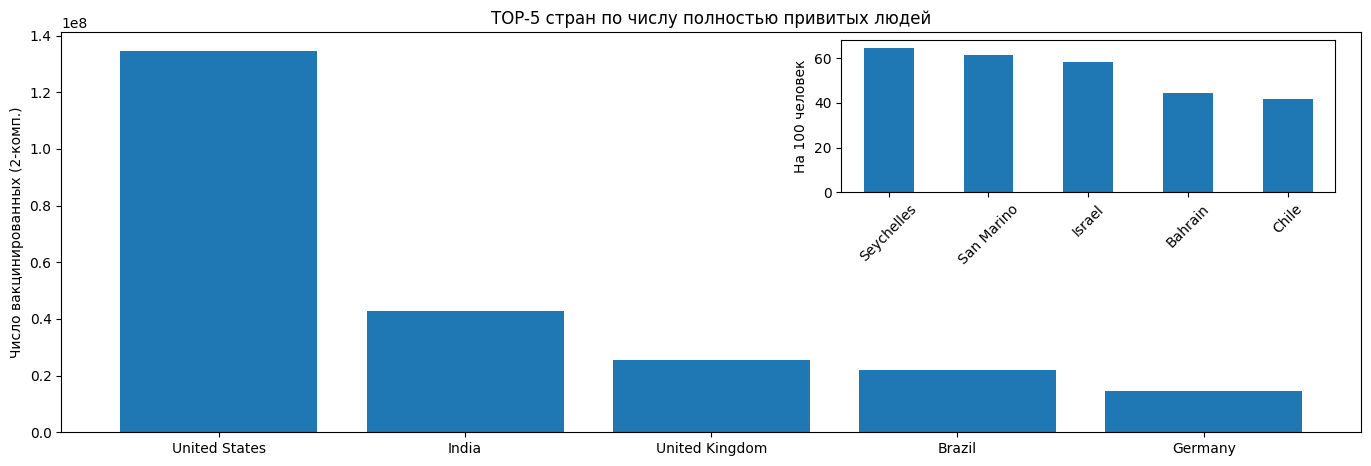

In [37]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vacc_country.index, height=vacc_country)
main_axes.set_ylabel('Число вакцинированных (2-комп.)')
main_axes.set_title('TOP-5 стран по числу полностью привитых людей')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index, height=vacc_country_per_hundred, width=0.5)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

## Графические возможности Subplots ##

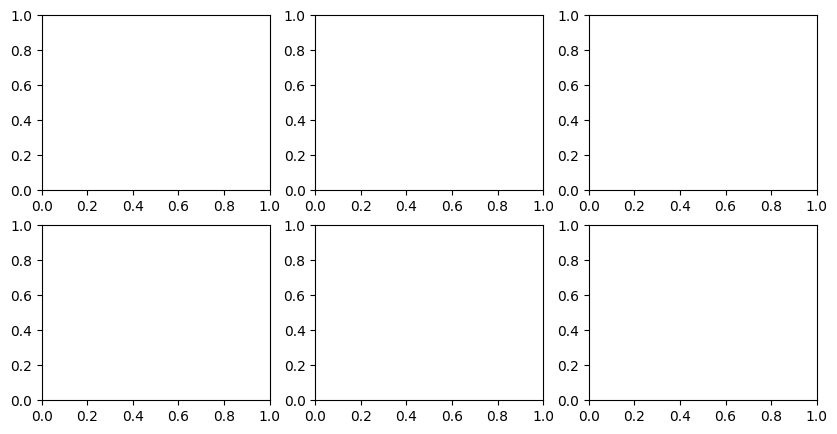

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

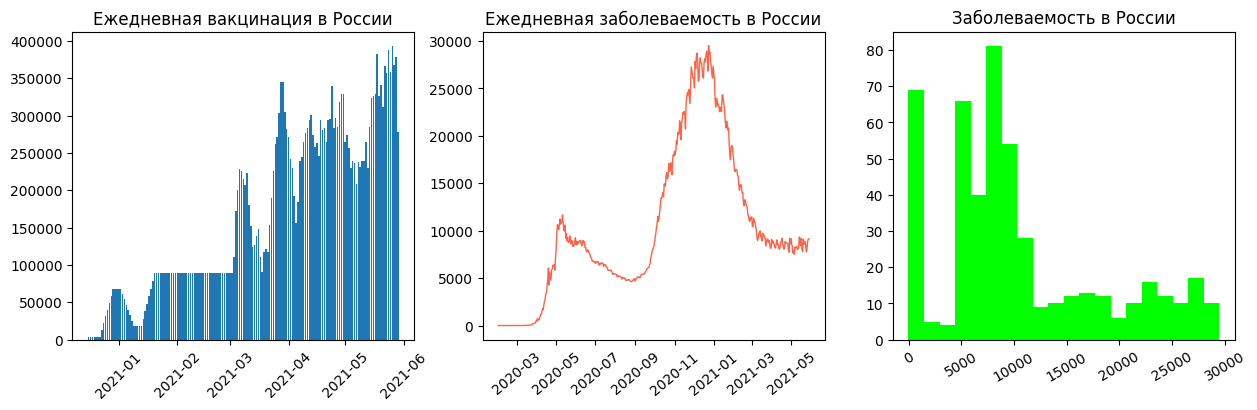

In [39]:
russia_data = covid_df[covid_df['country'] == 'Russia']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=1
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=40)

axes[2].hist(
    x=russia_data['daily_confirmed'],
    label='Число заболевших',
    color='lime',
    bins=20
)
axes[2].set_title('Заболеваемость в России')
axes[2].xaxis.set_tick_params(rotation=30)

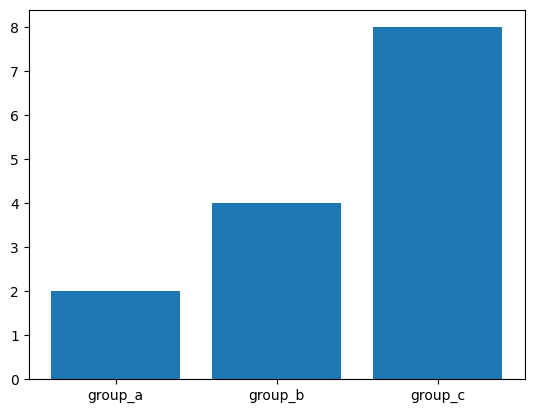

In [40]:
names = ['group_a', 'group_b', 'group_c']
values = [2, 4, 8]
plt.bar(names, values)
##### Не обязательно??? #####
plt.show()

## Графические возможности библиотеки Seaborn ##

In [41]:
import seaborn as sns
print(sns.__version__)

0.12.0


In [42]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]
populations = pd.DataFrame(
    [
        ['Canada', 37664517],
        ['Germany', 83721496],
        ['Russia', 145975300],
        ['Australia', 25726900],
        ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


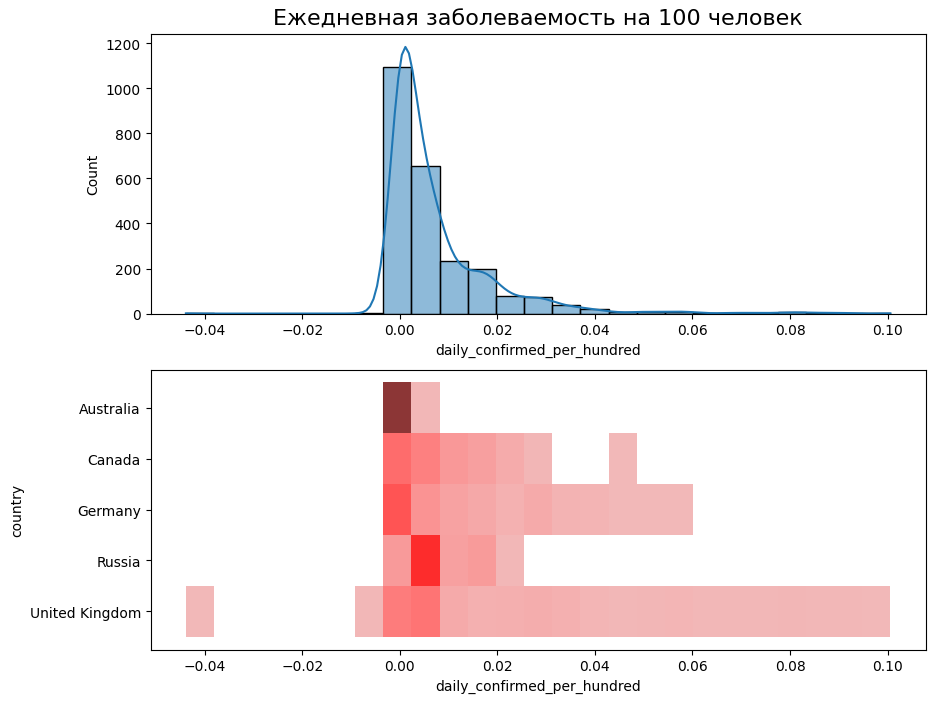

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Ежедневная заболеваемость на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

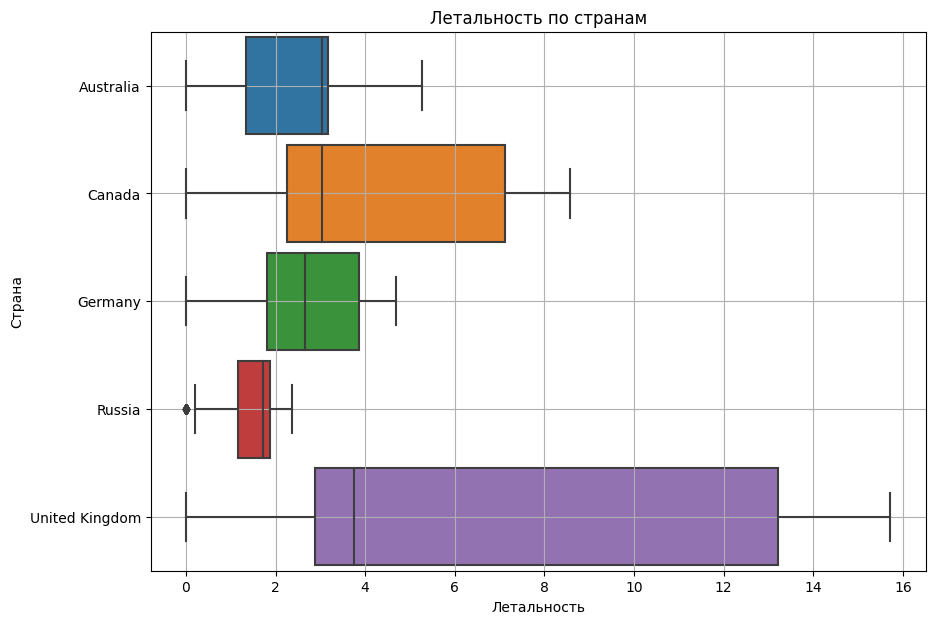

In [44]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Летальность по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid();

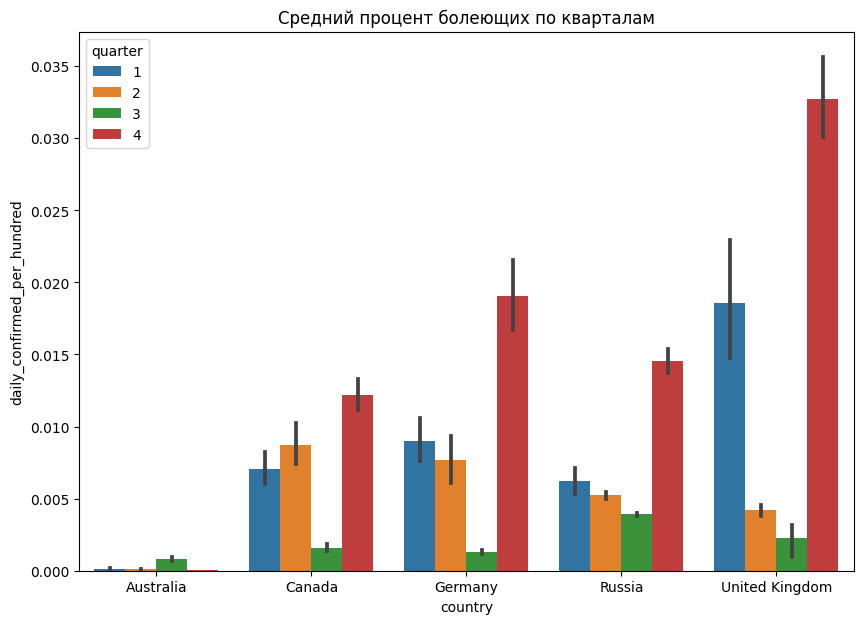

In [45]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющих по кварталам');

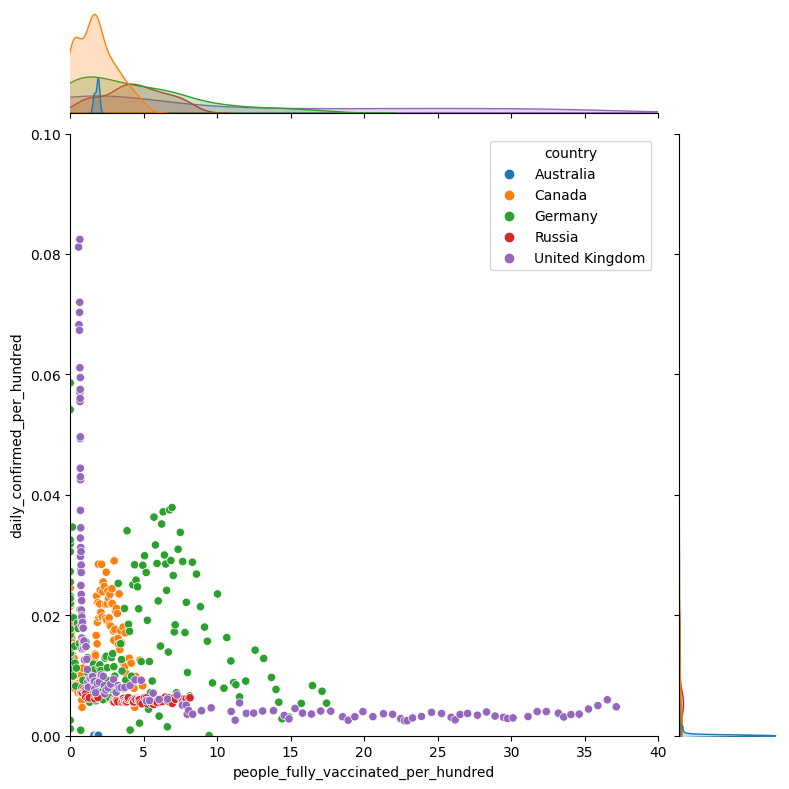

In [46]:
jointplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0, 40),
    ylim=(0, 0.1),
    height=8
);

In [47]:
pivott = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivott.columns = pivott.columns.astype('string')
display(pivott)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Тепловая карта вакцинации')

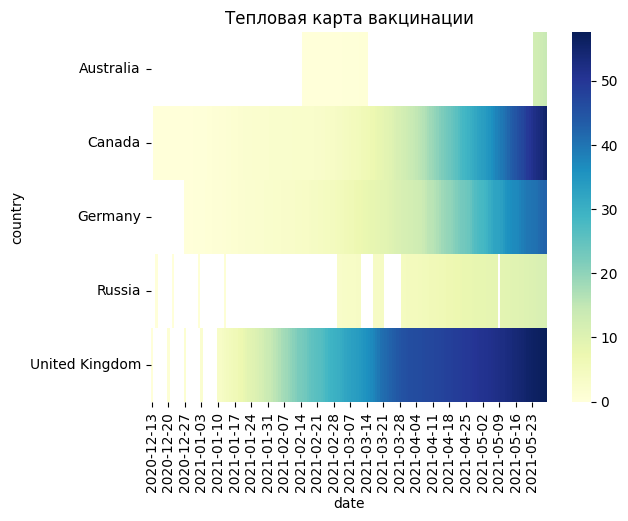

In [48]:
heatmap = sns.heatmap(data=pivott, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации')

----

###  Задание 6.4 ###

Создать новый признак `confirmed_per_hundred`, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (***confirmed/population*100***).

Построить тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (`confirmed_per_hundred`) в странах из таблицы `croped_covid_df`.

Выбрать верные выводы по построенному графику:
- **True** Из представленных стран самые быстрые темпы роста относительной заболеваемости — в Великобритании.
- **False** Суммарное число заболевших в Австралии превышает 2 % от общего числа населения.
- **False** Интенсивность относительной заболеваемости в России выше, чем в Германии.
- **True** Из представленных стран самая низкая скорость распространения вируса — в Австралии.

In [49]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
display(croped_covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2439
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2440 non-null   datetime64[ns]
 1   country                              2440 non-null   object        
 2   confirmed                            2440 non-null   float64       
 3   deaths                               2440 non-null   float64       
 4   recovered                            2440 non-null   float64       
 5   active                               2440 non-null   float64       
 6   daily_confirmed                      2435 non-null   float64       
 7   daily_deaths                         2435 non-null   float64       
 8   daily_recovered                      2435 non-null   float64       
 9   total_vaccinations                   649 non-null    float64       
 10  people_vacci

None

In [50]:
pivottt = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
display(pivottt)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


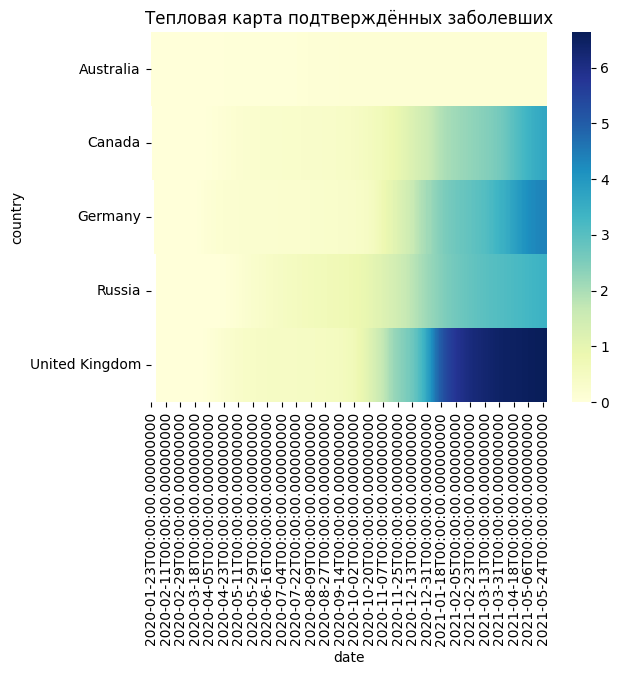

In [51]:
cph_heatmap = sns.heatmap(data=pivottt, cmap='YlGnBu')
cph_heatmap.set_title('Тепловая карта подтверждённых заболевших');

----

###  Задание 6.5 ###

Построить коробчатую диаграмму для признака `recover_rate` (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

Выбрать верные выводы по данному графику:
- **True** График для Великобритании имеет «сплюснутый» в нуле вид, что указывает либо на практически полное отсутствие случаев выздоровления, либо, с точки зрения здравого смысла, на неверные данные о числе выздоровевших пациентов в этой стране.
- **True** Наибольший разброс по проценту ежедневных выздоровлений — в Канаде.
- **False** Наименьшая медиана — у Германии.
- **False** В четырёх из пяти стран на графике медианный процент ежедневных выздоровлений превышает 80 %.

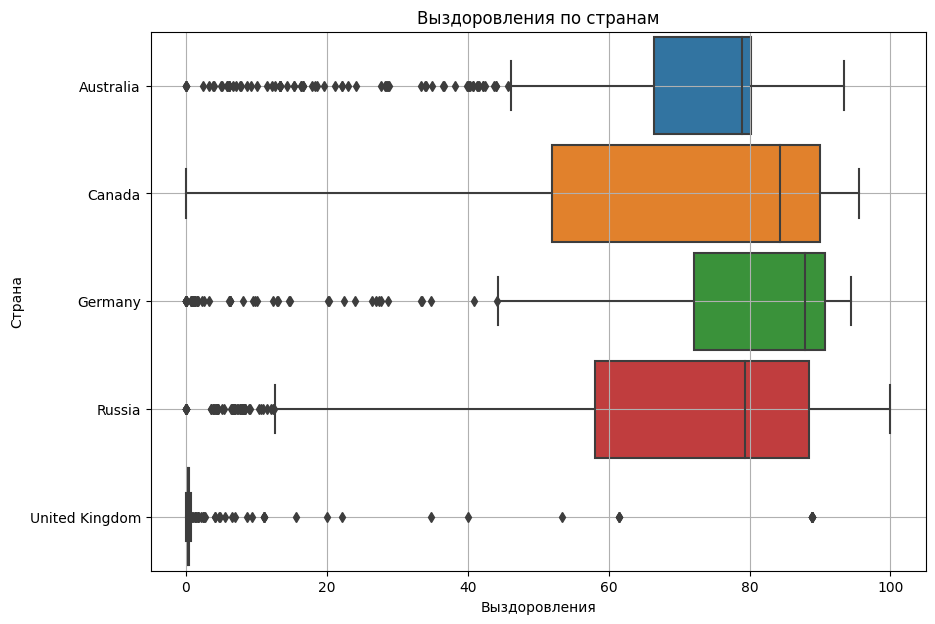

In [52]:
figase = plt.figure(figsize=(10, 7))
rr_boxplot = sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    orient='h',
    width=0.9
)
rr_boxplot.set_title('Выздоровления по странам')
rr_boxplot.set_xlabel('Выздоровления')
rr_boxplot.set_ylabel('Страна')
rr_boxplot.grid();